In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.metadata.create_all(engine)
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/9p/r4h2z6p50636kprqtwvhf1380000gn/T/ipykernel_10997/3600794735.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import session
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date


('2017-08-23',)

('2017-08-23',)


<Axes: xlabel='date'>

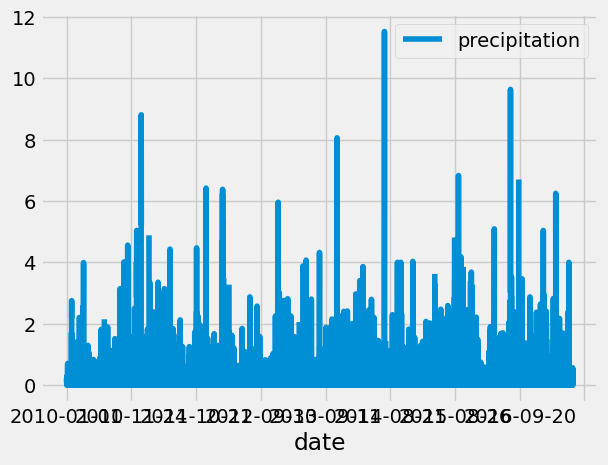

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(latest_date)
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).all()
precipitation_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
# Sort the dataframe by date
df = df.sort_values(by='date')
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [60]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station).order_by(func.count(measurement.station)).\
  group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00518838',),
 ('USC00517948',),
 ('USC00511918',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00519523',),
 ('USC00513117',),
 ('USC00519397',),
 ('USC00519281',)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temperature = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(min_temperature)

max_temperature = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(max_temperature)

avg_temperature = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(avg_temperature)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


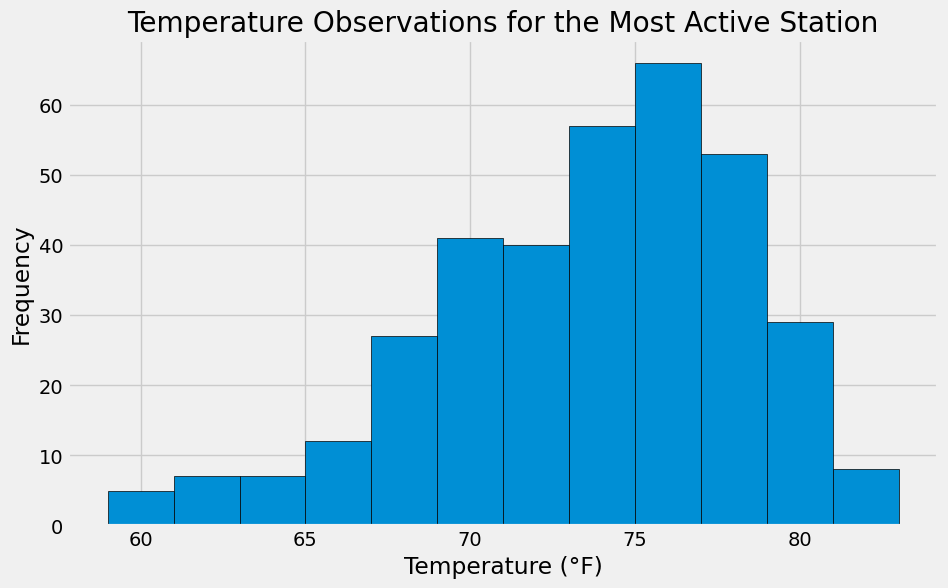

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
most_active_station_temperature = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= one_year_ago)
temperature_data = most_active_station_temperature.all()
temperature_data

temperatures = [temp[0] for temp in temperature_data]
plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=12, edgecolor='black')
plt.title("Temperature Observations for the Most Active Station")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [77]:
# Close Session
session.close()